In [23]:
#import packages
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import requests
import re


In [82]:
#import data

dataraw = requests.get("https://raw.githubusercontent.com/neherlab/covid19_scenarios/master/data/case-counts/unitedstates/USA-New%20York.tsv").text


68


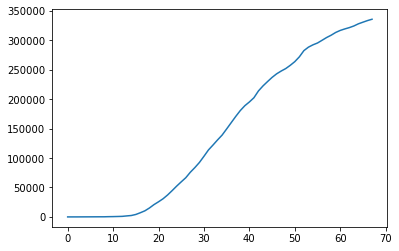

In [100]:
data= re.sub('\r','',dataraw).replace('\t\t','\t0\t').replace('\t\t','\t0\t').split('\n')[4:]
darray=np.array([data[0].split("\t")[1:5]])
for d in range(1, len(data)-1):
    darray=np.append(darray,[data[d].split("\t")[1:5]],axis=0)

darray=darray.astype(int)
#print(darray, len(darray))
#print(darray[1:,0]-darray[0:-1,0])
#print(datatable)
days=len(darray)
print(days)
plt.plot(darray[:,0])

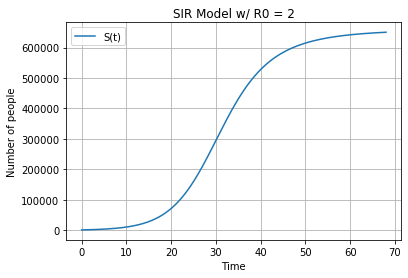

[  1012.54178853   1346.99945039   1755.10205009   2252.91946799
   2859.95680224   3599.85369764   4501.20913765   5598.54538273
   6933.42196577   8555.7039406   10524.97765053  12912.08865301
  15800.74869616  19289.11721608  23491.206467    28537.88282704
  34577.14374707  41773.24138798  50304.11684899  60356.53063113
  72118.2670305   85766.92075283 101455.10720679 119292.53952036
 139326.27936224 161521.48299797 185745.90197788 211761.83318176
 239228.79847692 267718.69560754 296742.79197727 325787.16596075
 354351.18765849 381982.90837103 408306.19572043 433036.62104337
 455985.70422164 477055.3038318  496225.1555194  513536.88490958
 529077.31060454 542963.03934044 555327.47946841 566310.68410526
 576051.94272992 584684.76323068 592333.77640357 599113.09381149
 605125.70244684 610463.55804293 615208.11694802 619431.11874368
 623195.4856243  626556.25301757 629561.47510509 632253.07321873
 634667.61088545 636836.98880368 638789.06062491 640548.17276938
 642135.63471309 643570.1

In [168]:
#ODEs
def SIR_model(y,t,k,gamma,N):
    S,I,R = y
    dS_dt = -k*S/N*I
    dI_dt = k*S/N*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt])
#Initial Conditions
N=700000
I0 = 1000
S0 =N-I0
R0 = 0
k = 0.3
gamma = 0.1

#Time vector
t = np.linspace(0,days,days*24)
#Result
solution = scipy.integrate.odeint(SIR_model,[S0,I0,R0], t, args=(k,gamma,N))
solution = np.array(solution)
#Plot result
plt.figure(figsize = [6,4])
plt.plot(t,N-solution[:,0],label="S(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.title("SIR Model w/ R0 = 2")
plt.show()

c_infections=N-solution[:,0][1::24]
print(c_infections)

0.3
-0.7
98101884343824.11
0.19999999999999998
13780405005382.467
improved
0.29
44893921685838.13
0.31
68082505799674.45
0.4
168378674676807.97
0.19999999999999998
-0.8
98122476969884.48
0.09999999999999998
92594861867115.11
0.18999999999999997
25190007657195.23
0.21
5514401435827.273
improved
0.3
56339175804842.31
0.21
-0.79
98120623737683.98
0.10999999999999999
90942875721362.06
0.19999999999999998
13780405005382.467
0.22
971238850225.8826
improved
0.31
68082505799674.45
0.22
-0.78
98118728819657.75
0.12
88561721702613.92
0.21
5514401435827.273
0.23
112633389711.72632
improved
0.32
79946213162646.14
0.23
-0.77
98116790800436.86
0.13
85106171938049.72
0.22
971238850225.8826
0.24000000000000002
2532160481649.021
0.33
91794331236757.05


<function print>

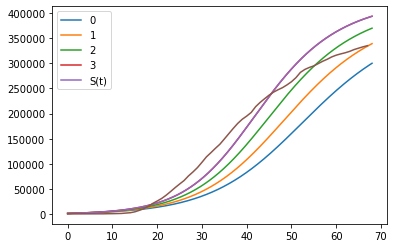

In [169]:
#Gradient Descent
N=500000
I0 = 1000
S0 =N-I0
R0 = 0
k = 0.3
gamma = 0.1
steps=[-1,-0.1,-0.01,0.01,0.1]
t = np.linspace(0,days,days*24)

def loss(csol):
    return np.sum(darray[:,0]-csol[1::24])**2
def csols(kk):
    return N-scipy.integrate.odeint(SIR_model,[S0,I0,R0], t, args=(kk,gamma,N))[:,0]
for i in range(0,10):
    print(k)
    thisk=k
    bestloss=loss(csols(k))
    for s in steps:
        print(k+s)
        thisloss=loss(csols(k+s))
        print(thisloss)
        if bestloss> thisloss:
            bestloss=thisloss
            thisk=k+s
            print("improved")
    if thisk==k:
        break
    k=thisk
        
    plt.plot(t,csols(k),label=str(i))
plt.plot(t,csols(k),label="S(t)")
plt.legend()
plt.plot(darray[:,0])
print

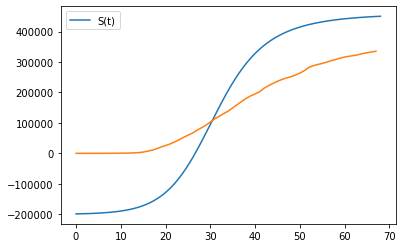

In [170]:
plt.plot(t,N-solution[:,0],label="S(t)")
plt.plot(darray[:,0])
plt.legend()
plt.show()

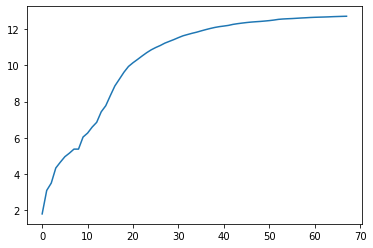

In [171]:
plt.plot(np.log(darray[:,0]))

No handles with labels found to put in legend.
[0.36109226 0.30164941 0.21964751 0.31609987 0.28453494 0.29782549
 0.29337012 0.39582014 0.39007564 0.44235454 0.48873812 0.44839361
 0.42766267 0.38477614 0.32773689 0.27760664 0.24232072 0.21882834
 0.19309778 0.1677425  0.15117263 0.14372555 0.12949144 0.11763719
 0.11108286 0.10680676 0.0987689  0.08889336 0.08199933 0.07814003
 0.07264488 0.0674179  0.06490118 0.06051738 0.05530496 0.04942364
 0.04792149 0.04400966 0.04008862 0.03766191 0.03608481 0.03306962
 0.02685665 0.02412361 0.02281266 0.02298191 0.02532871 0.02543181
 0.02466384 0.02264356 0.02118287 0.01878721 0.01474916 0.01385141
 0.01338293 0.01289883 0.01148894 0.01036253 0.0101152 ]
0.48873812311495435


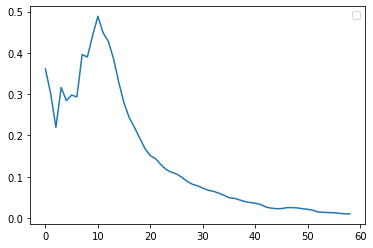

In [190]:
smoothn=3
smothinf=[np.average(darray[:,0][i-smoothn:i+smoothn]) for i in range(smoothn,len(darray)-1-smoothn)]
datalog=np.log(np.divide(smothinf[1:-1],smothinf[0:-2]))
print(datalog)
print(max(datalog))
#plt.plot(smothinf)
plt.plot(datalog)
plt.legend()